<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=sns.get_dataset_names()

In [ ]:
data

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df=pd.read_csv('/content/sample_data/titanic.csv')

In [ ]:
df.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [ ]:
df.isnull().sum()

,0
Pclass,0
Gender,0
Age,263
SibSp,0
ParCh,0
Fare,1
Embarked,2
Status,0


In [ ]:
# here in above age, fare and embarked has missing values

In [ ]:
df['Age'].value_counts()

,count
Age,
24.0,47
22.0,43
21.0,41
30.0,40
18.0,39
...,...
66.0,1
0.7,1
76.0,1


In [ ]:
df[df['Age'].isnull()]

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
15,1,Male,NaN,0,0,25.93,Southampton,D
37,1,Male,NaN,0,0,26.55,Southampton,S
40,1,Male,NaN,0,0,39.60,Cherbourg,D
46,1,Male,NaN,0,0,31.00,Southampton,D
59,1,Female,NaN,0,0,27.72,Cherbourg,S
...,...,...,...,...,...,...,...,...
1293,3,Male,NaN,0,0,8.05,Southampton,D
1297,3,Male,NaN,0,0,7.25,Southampton,D
1302,3,Male,NaN,0,0,7.23,Cherbourg,D
1303,3,Male,NaN,0,0,14.46,Cherbourg,D


In [ ]:
df['Age'].notnull().value_counts()

,count
Age,
True,1046
False,263


In [ ]:
df['Age'].isnull().value_counts()

,count
Age,
False,1046
True,263


In [ ]:
df.isnull().sum()/len(df)*100

,0
Pclass,0.000000
Gender,0.000000
Age,20.091673
SibSp,0.000000
ParCh,0.000000
Fare,0.076394
Embarked,0.152788
Status,0.000000


In [ ]:
df[df['Age'].notnull()].value_counts()

Pclass  Gender  Age   SibSp  ParCh  Fare   Embarked     Status
2       Male    30.0  0      0      13.00  Southampton  D         5
3       Male    17.0  0      0      8.66   Southampton  D         4
2       Female  29.0  1      0      26.00  Southampton  S         3
3       Male    20.0  0      0      7.85   Southampton  D         3
                21.0  0      0      8.05   Southampton  D         3
                                                                 ..
2       Female  26.0  0      0      13.50  Southampton  S         1
                      1      1      26.00  Southampton  D         1
                27.0  0      0      10.50  Southampton  S         1
                      1      0      13.86  Cherbourg    S         1
3       Male    74.0  0      0      7.78   Southampton  D         1
Name: count, Length: 970, dtype: int64

In [ ]:
# here missing value % is 20 for age we need to check with clients and discuss

<Axes: ylabel='Age'>

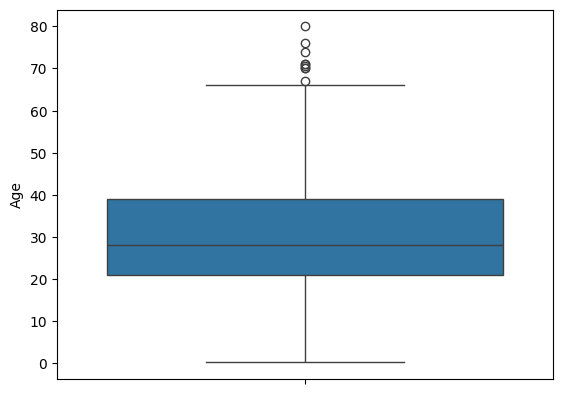

In [ ]:
sns.boxplot(y='Age',data=df)

In [ ]:
# so we have outliers hence by median

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-333-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
from scipy.stats import zscore

In [ ]:
df['age_zsc']=zscore(df['Age'])

In [ ]:
df.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc
0,1,Female,29.0,0,0,211.34,Southampton,S,-0.039008
1,1,Male,0.9,1,2,151.55,Southampton,S,-2.217259
2,1,Female,2.0,1,2,151.55,Southampton,D,-2.131989
3,1,Male,30.0,1,2,151.55,Southampton,D,0.038510
4,1,Female,25.0,1,2,151.55,Southampton,D,-0.349079


In [ ]:
df[(df['age_zsc']>3) | (df['age_zsc']< -3)]

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc
9,1,Male,71.0,0,0,49.50,Cherbourg,D,3.216741
14,1,Male,80.0,0,0,30.00,Southampton,S,3.914401
61,1,Female,76.0,1,0,78.85,Southampton,S,3.604330
81,1,Male,70.0,1,1,71.00,Southampton,D,3.139223
135,1,Male,71.0,0,0,34.65,Cherbourg,D,3.216741
506,2,Male,70.0,0,0,10.50,Southampton,D,3.139223
727,3,Male,70.5,0,0,7.75,Queenstown,D,3.177982
1235,3,Male,74.0,0,0,7.78,Southampton,D,3.449295


In [ ]:
# we found outlierss

In [ ]:
df.isnull().sum()

,0
Pclass,0
Gender,0
Age,0
SibSp,0
ParCh,0
Fare,1
Embarked,2
Status,0
age_zsc,0


In [ ]:
df[df['Embarked'].isnull()]

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc
168,1,Female,38.0,0,0,80.0,NaN,S,0.658653
284,1,Female,62.0,0,0,80.0,NaN,S,2.519081


In [ ]:
df['Embarked'].mode()

,Embarked
0,Southampton


In [ ]:
df['Embarked'].value_counts().sort_index(ascending=False).index[0]

'Southampton'

In [ ]:
df['Embarked'].mode()[0]

'Southampton'

In [ ]:
df['Embarked'].isnull().sum()

2

In [ ]:
df['Embarked'].value_counts().sort_index(ascending=False)[0]

<ipython-input-346-6c490c96ab81>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Embarked'].value_counts().sort_index(ascending=False)[0]


914

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-347-4a47dd7a9b9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [ ]:
df[df['Embarked'].isnull()]

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc


In [ ]:
df.isnull().sum()

,0
Pclass,0
Gender,0
Age,0
SibSp,0
ParCh,0
Fare,1
Embarked,0
Status,0
age_zsc,0


In [ ]:
df['Fare'].isnull().sum()

1

In [ ]:
df[df['Fare'].isnull()]

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc
1225,3,Male,60.5,0,0,NaN,Southampton,D,2.402804


In [ ]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

<ipython-input-352-ca3880b56554>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace=True)


In [ ]:
df[df['Fare'].isnull()]

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc


In [ ]:
df['Gender']

,Gender
0,Female
1,Male
2,Female
3,Male
4,Female
...,...
1304,Female
1305,Female
1306,Male
1307,Male


In [ ]:
df["Gender"].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Status    1309 non-null   object 
 8   age_zsc   1309 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


In [ ]:
df['Gender1']=df["Gender"].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    1309 non-null   int64   
 1   Gender    1309 non-null   object  
 2   Age       1309 non-null   float64 
 3   SibSp     1309 non-null   int64   
 4   ParCh     1309 non-null   int64   
 5   Fare      1309 non-null   float64 
 6   Embarked  1309 non-null   object  
 7   Status    1309 non-null   object  
 8   age_zsc   1309 non-null   float64 
 9   Gender1   1309 non-null   category
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 93.6+ KB


In [ ]:
# df["Gender"]=df["Gender"].cat.codes

In [ ]:
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


In [ ]:
df['Gender1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Gender1_cat_codes
Non-Null Count  Dtype
--------------  -----
1309 non-null   int8 
dtypes: int8(1)
memory usage: 1.4 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_Ge=LabelEncoder()
df['Gender2']=le_Ge.fit_transform(df['Gender'])

df['Gender2']

,Gender2_Label_enc
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [ ]:
le=le_Ge.inverse_transform(df['Gender2'][0:1])

In [ ]:
le

array(['Female'], dtype=object)

In [ ]:
le_Ge.inverse_transform([0])

array(['Female'], dtype=object)

In [ ]:
df['Gender2'][0:1]

,Gender2_Label_enc
0,0


In [ ]:
le_Ge.inverse_transform([1])

array(['Male'], dtype=object)

In [ ]:
le_Ge.inverse_transform(df['Gender2'].unique())

array(['Female', 'Male'], dtype=object)

In [ ]:
df.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc,Gender1,Gender1_cat_codes,Gender2_Label_enc
0,1,Female,29.0,0,0,211.34,Southampton,S,-0.039008,Female,0,0
1,1,Male,0.9,1,2,151.55,Southampton,S,-2.217259,Male,1,1
2,1,Female,2.0,1,2,151.55,Southampton,D,-2.131989,Female,0,0
3,1,Male,30.0,1,2,151.55,Southampton,D,0.038510,Male,1,1
4,1,Female,25.0,1,2,151.55,Southampton,D,-0.349079,Female,0,0


,Pclass,Age,SibSp,ParCh,Fare,Embarked,Status,age_zsc,Gender1,Gender1_cat_codes,Gender2_Label_enc,Gender_Female,Gender_Male
0,1,29.0,0,0,211.34,Southampton,S,-0.039008,Female,0,0,True,False
1,1,0.9,1,2,151.55,Southampton,S,-2.217259,Male,1,1,False,True
2,1,2.0,1,2,151.55,Southampton,D,-2.131989,Female,0,0,True,False
3,1,30.0,1,2,151.55,Southampton,D,0.038510,Male,1,1,False,True
4,1,25.0,1,2,151.55,Southampton,D,-0.349079,Female,0,0,True,False
